## Изучение общей информации

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [5]:
df.isna().mean()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


Мы получили датафрейм с 22 колонками на 23699 строк. Изучив его, сразу бросаются в глаза пропущенные значения в столбцах:
    
    'ceiling_height',
    'floors_total',
    'living_area',
    'is_apartment',
    'kitchen_area',
    'balcony',
    'locality_name',
    'airports_nearest',
    'cityCenters_nearest',
    'parks_around3000',
    'parks_nearest',
    'ponds_around3000',
    'ponds_nearest',
    'days_exposition'.
Кроме того, присутствуют названия столбцов с camelCase. Есть неподходящие типы данных. Например, float в целочисленных значениях и object в значениях даты-времени. Еще обнаружил нулевые значения в столбце 'rooms'. Я думаю, что 0 комнат - это либо опечатка, либо затычка. Есть предположение, что так обозначаются квартиры со свободной планировкой (без стен), но пока буду считать, что это ошибка.

## Предобработка данных

In [7]:
df = df.rename({'cityCenters_nearest': 'city_centers_nearest',
                'parks_around3000': 'parks_around_3000',
                'ponds_around3000': 'ponds_around_3000'}, axis='columns')
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [8]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [9]:
df[['balcony', 'is_apartment']] = df[['balcony', 'is_apartment']].fillna(0)
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропущенные значения в столбце 'balcony' можно заменить на 0, т.к. их скорее всего нет. Так же предполагаю, что в столбце 'is_apartment' пропущенные значения тоже являются нулями на самом деле (люди просто не указывали это в описании, так как жилье не является апартаментами).

In [10]:
df['is_apartment'] = df['is_apartment'].astype('bool')

df[['last_price', 'balcony']] = df[['last_price', 'balcony']].astype('int')

df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [11]:
for row in df['locality_name'].sort_values().unique():
    print(row)

Бокситогорск
Волосово
Волхов
Всеволожск
Выборг
Высоцк
Гатчина
Зеленогорск
Ивангород
Каменногорск
Кингисепп
Кириши
Кировск
Колпино
Коммунар
Красное Село
Кронштадт
Кудрово
Лодейное Поле
Ломоносов
Луга
Любань
Мурино
Никольское
Новая Ладога
Отрадное
Павловск
Петергоф
Пикалёво
Подпорожье
Приморск
Приозерск
Пушкин
Санкт-Петербург
Светогорск
Сертолово
Сестрорецк
Сланцы
Сосновый Бор
Сясьстрой
Тихвин
Тосно
Шлиссельбург
городской поселок Большая Ижора
городской поселок Янино-1
городской посёлок Будогощь
городской посёлок Виллози
городской посёлок Лесогорский
городской посёлок Мга
городской посёлок Назия
городской посёлок Новоселье
городской посёлок Павлово
городской посёлок Рощино
городской посёлок Свирьстрой
городской посёлок Советский
городской посёлок Фёдоровское
городской посёлок Янино-1
деревня Агалатово
деревня Аро
деревня Батово
деревня Бегуницы
деревня Белогорка
деревня Большая Вруда
деревня Большая Пустомержа
деревня Большие Колпаны
деревня Большое Рейзино
деревня Большой Сабск
деревня 

In [12]:
df['locality_name'].nunique()

364

In [13]:
df['locality_name'] = df['locality_name'].str.replace('ё','е')
df['locality_name'] = df['locality_name'].str.replace('при железнодорожной ', '')

In [14]:
df['locality_name'].nunique()

328

In [15]:
def fill_na(data, column):
    print('Медиана до заполнения пропусков:', data[column].median())
    data[column] = data.groupby('rooms')[column].transform(lambda x: x.fillna(x.median())).copy()
    data[column] = data[column].fillna(data[column].median()).copy()
    print('Медиана после заполнения пропусков:', data[column].median())
    
    return data[column]

In [16]:
df['kitchen_area'] = fill_na(df, 'kitchen_area')

Медиана до заполнения пропусков: 9.1
Медиана после заполнения пропусков: 9.04


In [17]:
df['living_area'] = fill_na(df, 'living_area')

Медиана до заполнения пропусков: 30.0
Медиана после заполнения пропусков: 30.3


In [18]:
df['ceiling_height'] = fill_na(df, 'ceiling_height')

Медиана до заполнения пропусков: 2.65
Медиана после заполнения пропусков: 2.64


In [19]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [20]:
df.duplicated().sum()

0

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23613 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
city_centers_nearest    18180 non-null float64
parks_around_3000       18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around

In [22]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,2.64,11.0,18.6,1,False,...,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,2.60,5.0,34.3,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,2.65,14.0,45.0,9,False,...,9.5,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Там, где нет NaN, заменил тип данных float на int. Столбец 'is_apartment' привел к булеву типу, т.к. там булева логика: 0 и 1. Ну и 'first_day_exposition' привел к типу datetime. Так как изначально во всех столбцах время было 00:00:00, то оно пропало после смены формата. Убрал неявные дубликаты: "посёлок" и "поселок", "поселок при железнодорожной станции" и "поселок при станции" (гугл показал, что в Ленинградской области это одно и то же).

Еще заменил пропущенные значения в столбцах 'kitchen_area', 'living_area' и 'ceiling_height' на сгруппированые по общей площади и количеству комнат медианные значения. Те пропуски, которые не попали ни под одну группу, я заменил медианой по всем значениям.

## Расчёты и добавление результатов в таблицу

In [23]:
df['price_per_square'] = (df['last_price'] / df['total_area']).astype('int')

In [24]:
df['day_of_week'] = pd.DatetimeIndex(df['first_day_exposition']).weekday
df['month'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['year'] = pd.DatetimeIndex(df['first_day_exposition']).year
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square,day_of_week,month,year
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.64,11.0,18.6,1,False,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.60,5.0,34.3,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785,3,8,2015
3,0,64900000,159.0,2015-07-24,3,2.65,14.0,45.0,9,False,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000,1,6,2018


In [25]:
def category_floor(data):
    if data[1] == 1:
        return 'первый'
    elif data[1] == data[0]:
        return 'последний'
    return 'другой'

In [26]:
df['group_floor'] = df[['floors_total', 'floor']].apply(category_floor, axis=1)

In [27]:
df['living_to_total'] = round(df['living_area'] / df['total_area'], 2)
df['kitchen_to_total'] = round(df['kitchen_area'] / df['total_area'], 2)

In [28]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,price_per_square,day_of_week,month,year,group_floor,living_to_total,kitchen_to_total
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,2.0,755.0,NaN,120370,3,3,2019,другой,0.47,0.23
1,7,3350000,40.4,2018-12-04,1,2.64,11.0,18.6,1,False,...,0.0,NaN,81.0,82920,1,12,2018,первый,0.46,0.27
2,10,5196000,56.0,2015-08-20,2,2.60,5.0,34.3,4,False,...,2.0,574.0,558.0,92785,3,8,2015,другой,0.61,0.15
3,0,64900000,159.0,2015-07-24,3,2.65,14.0,45.0,9,False,...,3.0,234.0,424.0,408176,4,7,2015,другой,0.28,0.06
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,1.0,48.0,121.0,100000,1,6,2018,другой,0.32,0.41


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 29 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23613 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
city_centers_nearest    18180 non-null float64
parks_around_3000       18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around

Посчитал и добавил в таблицу:


    цену квадратного метра;
    день недели, месяц и год публикации объявления;
    этаж квартиры; варианты — первый, последний, другой;
    соотношение жилой и общей площади, а также отношение площади кухни к общей.

## Исследовательский анализ данных

In [30]:
def analysis_hist(data, column):
    print(data[column].describe())
    flagell_min = data[column].quantile(0.25) - (data[column].quantile(0.75) - data[column].quantile(0.25)) * 3
    flagell_max = data[column].quantile(0.75) + (data[column].quantile(0.75) - data[column].quantile(0.25)) * 3
    data[column].plot(kind='hist',
                      bins='fd',
                      figsize=(8, 4),
                      grid=True,
                      title=column,
                      xlim=(flagell_min, flagell_max));

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64


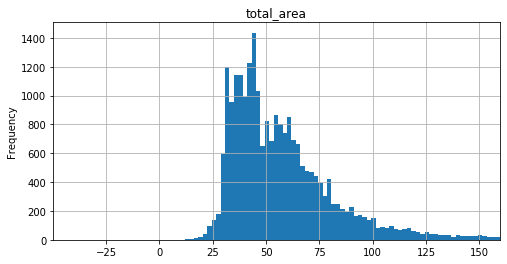

In [31]:
analysis_hist(df, 'total_area')

Большая часть продающихся квартир имеет общую площадь от 40 до 69.9 квадратных метров. Сильно выделяются 12-ти и 900-метровые квартиры, но таких квартир очень мало.

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64


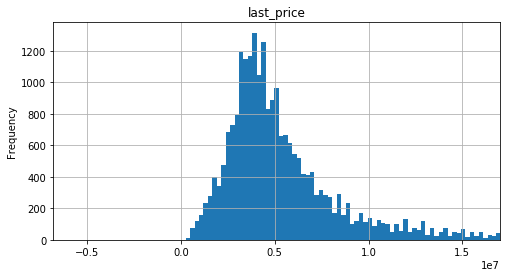

In [32]:
analysis_hist(df, 'last_price')

Большая часть квартир продается за цену от 3.4 до 6.8млн.р. Здесь есть подозрительные цены на квартиру в 12190р. и 763млн.р.

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


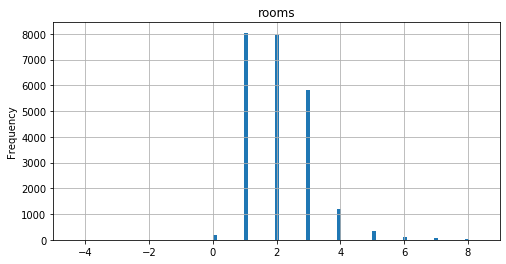

In [33]:
analysis_hist(df, 'rooms')

In [34]:
df['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

In [35]:
len(df.query('open_plan == False and rooms == 0'))

138

Чаще всего продаются 1, 2 и 3-комнатные квартиры. Квартиры с 15, 16 и 19 комнатами - это не ошибка записи. Гугл сообщает, что в Питере есть коммуналка даже на 34 комнаты. А вот 0 комнат при отрицательном значении свободной планировки напрягает. Всего таких нулевых комнат 138 - это почти 0.6% от всех значений. Думаю, если их удалить, то страшного ничего не произойдет.

count    23699.000000
mean         2.722536
std          0.989693
min          1.000000
25%          2.600000
50%          2.640000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64


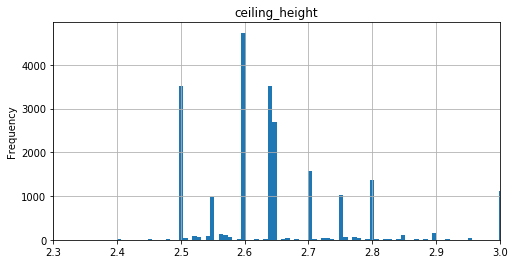

In [36]:
analysis_hist(df, 'ceiling_height')

В основном квартиры имеют высоту потолков от 2.6 до 2.7м. Бросаются в глаза 100-метровые и метровые потолки

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


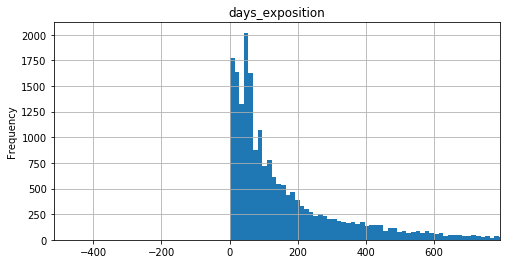

In [37]:
analysis_hist(df, 'days_exposition')

В основной массе объявление о продаже висит от 45 дней до 7 с половиной месяцев (232 дня). Среднее значение составляет 180 дней. Медиана - 95 дней. Межквартильный размах составляет 187 дней. Значит, все нижние значения (в том числе и минимальное - 1 день) можно считать характерными для продажи квартиры. А все квартиры, которые продавались более 513 дней (232 + 187 * 1.5), можно считать выбросами.

In [38]:
df['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

In [39]:
len(df.query('total_area < 27')) / len(df)

0.013587071184438162

In [40]:
len(df.query('total_area > 170')) / len(df)

0.01557027722688721

In [41]:
len(df.query('not(27 <= total_area <= 170)')) / len(df)

0.029157348411325373

Межквартильный размах общей площади ('total_area') составляет 29.9. Значит квартиры, чья площадь больше, чем  114.8кв.м, можно считать выбросами. Но если мы отбросим все, что выше 114.8, то отсеится слишком много значений. На гистрограмме видно, что начиная со 170 значений становится очень мало. Вот и будем отталкиваться от 170. Значения менее 27 так же редки. Их тоже отсекаем.

In [42]:
df['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [43]:
len(df.query('last_price > 25e+6')) / len(df)

0.019578885185028903

In [44]:
len(df.query('last_price < 1.2e+6')) / len(df)

0.015232710240938436

In [45]:
len(df.query('not(1.2e+6 <= last_price <= 25e+6)')) / len(df)

0.03481159542596734

Межквартильный размах цены объекта ('last_price') составляет 3 400 000р. Значит квартиры, чья стоимость больше, чем  11 900 000р, можно считать выбросами. Но если мы отбросим все, что выше 11.9млн.р, то отсеится слишком много значений. На гистрограмме видно, что начиная с 25млн.р значений становится очень мало. Вот и будем отталкиваться от 25 000 000р. Квартир со стоимостью менее 1.2млн.р тоже мало. Их тоже отсеиваем.

In [46]:
df['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [47]:
len(df.query('rooms > 6')) / len(df)

0.00379762859192371

In [48]:
len(df.query('open_plan == False and rooms == 0')) / len(df)

0.005823030507616355

In [49]:
len(df.query('open_plan == False and rooms == 0 or rooms > 6')) / len(df)

0.009620659099540066

Межквартильный размах количества комнат ('rooms') составляет 2. Значит квартиры, количество комнат в которой больше, чем 6, можно считать выбросами. Таких квартир достаточно мало. Вот и будем отталкиваться от 6. Но еще есть помещения с нулевыми комнатами. Отсеим так же те квартиры, где свободная планировка имеет отрицательное значение и 0 комнатами.

In [50]:
df['ceiling_height'].describe()

count    23699.000000
mean         2.722536
std          0.989693
min          1.000000
25%          2.600000
50%          2.640000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [51]:
len(df.query('ceiling_height < 2.5')) / len(df)

0.0030802987467825646

In [52]:
len(df.query('ceiling_height > 3.3')) / len(df)

0.02654120427022237

In [53]:
len(df.query('not(2.5 <= ceiling_height <= 3.3 or ceiling_height.isna())')) / len(df)

0.029621503017004936

Межквартильный размах высоты потолков ('ceiling_height') составляет 0.1. Значит квартиры, чья высота потолков больше, чем  2.85м, можно считать выбросами. Но если мы отбросим все, что выше 2.85м, то отсеится слишком много значений. На гистрограмме видно, что начиная с 3.3м значений становится очень мало. Вот и будем отталкиваться от 3.3м. Квартир с высотой потолков менее 2.5м тоже мало. Их тоже уберем.

In [54]:
clear_df = df.query('(27 <= total_area <= 170) and \
                    (1.2e+6 <= last_price <= 25e+6) and \
                    (not(open_plan == False) and not(rooms == 0) or rooms <= 6) and \
                    (2.5 <= ceiling_height <= 3.3 or ceiling_height.isna())').reset_index(drop=True)

In [55]:
clear_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21864 entries, 0 to 21863
Data columns (total 29 columns):
total_images            21864 non-null int64
last_price              21864 non-null int64
total_area              21864 non-null float64
first_day_exposition    21864 non-null datetime64[ns]
rooms                   21864 non-null int64
ceiling_height          21864 non-null float64
floors_total            21787 non-null float64
living_area             21864 non-null float64
floor                   21864 non-null int64
is_apartment            21864 non-null bool
studio                  21864 non-null bool
open_plan               21864 non-null bool
kitchen_area            21864 non-null float64
balcony                 21864 non-null int64
locality_name           21818 non-null object
airports_nearest        16908 non-null float64
city_centers_nearest    16926 non-null float64
parks_around_3000       16927 non-null float64
parks_nearest           7252 non-null float64
ponds_around

In [56]:
clear_df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,price_per_square,day_of_week,month,year,group_floor,living_to_total,kitchen_to_total
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,2.0,755.0,NaN,120370,3,3,2019,другой,0.47,0.23
1,7,3350000,40.4,2018-12-04,1,2.64,11.0,18.6,1,False,...,0.0,NaN,81.0,82920,1,12,2018,первый,0.46,0.27
2,10,5196000,56.0,2015-08-20,2,2.60,5.0,34.3,4,False,...,2.0,574.0,558.0,92785,3,8,2015,другой,0.61,0.15
3,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,1.0,48.0,121.0,100000,1,6,2018,другой,0.32,0.41
4,10,2890000,30.4,2018-09-10,1,2.64,12.0,14.4,5,False,...,NaN,NaN,55.0,95065,0,9,2018,другой,0.47,0.30


In [57]:
1 - len(clear_df) / len(df)

0.0774294274020001

count    21864.000000
mean        56.678112
std         22.635691
min         27.000000
25%         40.000000
50%         51.300000
75%         67.300000
max        170.000000
Name: total_area, dtype: float64


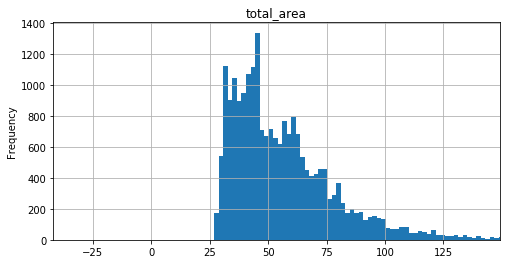

In [58]:
analysis_hist(clear_df, 'total_area')

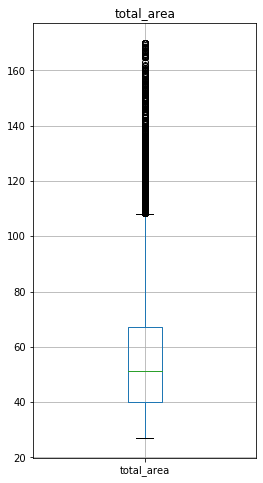

In [59]:
clear_df['total_area'].plot(kind='box',
                            figsize=(4, 8),
                            grid=True,
                            title='total_area');

count    2.186400e+04
mean     5.538041e+06
std      3.379177e+06
min      1.200000e+06
25%      3.499000e+06
50%      4.600000e+06
75%      6.500000e+06
max      2.500000e+07
Name: last_price, dtype: float64


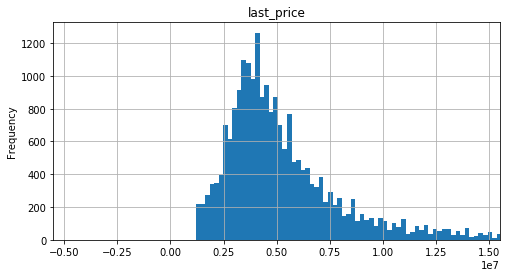

In [60]:
analysis_hist(clear_df, 'last_price')

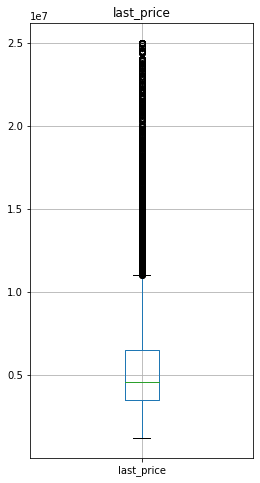

In [61]:
clear_df['last_price'].plot(kind='box',
                            figsize=(4, 8),
                            grid=True,
                            title='last_price');

count    21864.000000
mean         2.009971
std          0.937751
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64


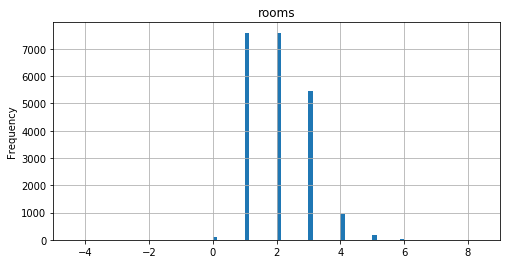

In [62]:
analysis_hist(clear_df, 'rooms')

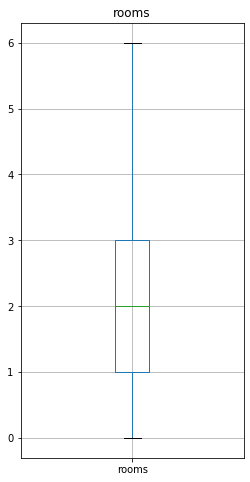

In [63]:
clear_df['rooms'].plot(kind='box',
                       figsize=(4, 8),
                       grid=True,
                       title='rooms');

count    21864.000000
mean         2.666733
std          0.155341
min          2.500000
25%          2.600000
50%          2.640000
75%          2.700000
max          3.300000
Name: ceiling_height, dtype: float64


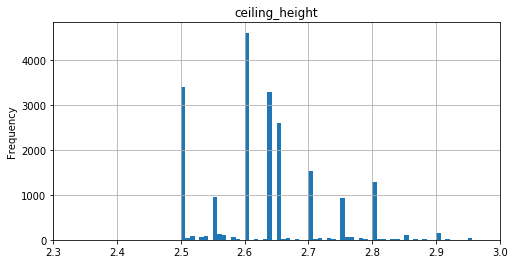

In [64]:
analysis_hist(clear_df, 'ceiling_height')

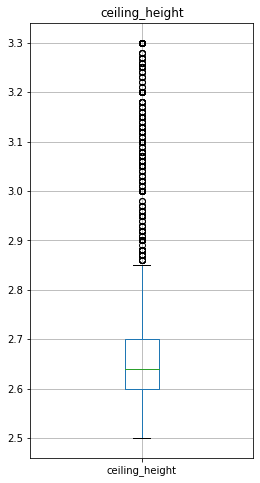

In [65]:
clear_df['ceiling_height'].plot(kind='box',
                                figsize=(4, 8),
                                grid=True,
                                title='ceiling_height');

В итоге отсек 7.7% выбросов и очень редких значений. Создал очищенную таблицу clear_df.

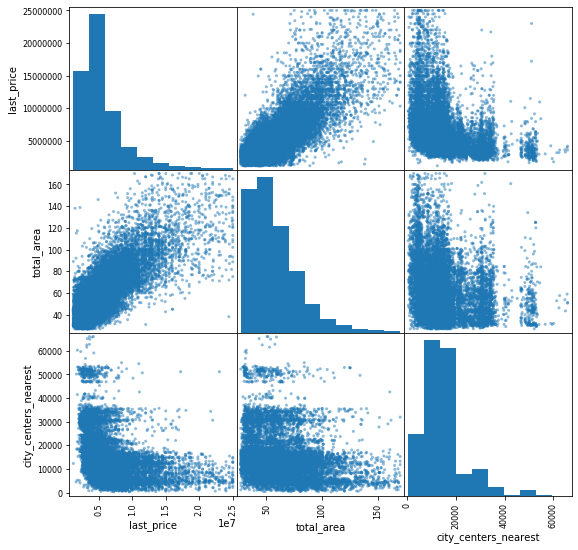

In [66]:
pd.plotting.scatter_matrix(clear_df[['last_price',
                                     'total_area',
                                     'city_centers_nearest']], figsize=(9, 9));

In [67]:
clear_df[['last_price', 'total_area', 'city_centers_nearest']].corr()

,last_price,total_area,city_centers_nearest
last_price,1.000000,0.770010,-0.340866
total_area,0.770010,1.000000,-0.196781
city_centers_nearest,-0.340866,-0.196781,1.000000


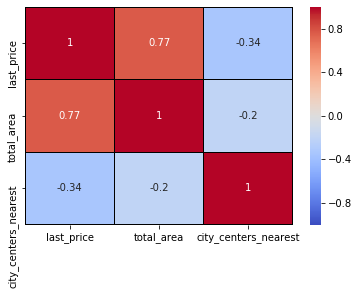

In [68]:
sns.heatmap(clear_df[['last_price',
                      'total_area',
                      'city_centers_nearest']].corr(),
            annot=True,
            vmin=-1,
            vmax=1,
            center= 0,
            cmap='coolwarm',
            linewidths=.01,
            linecolor='black');

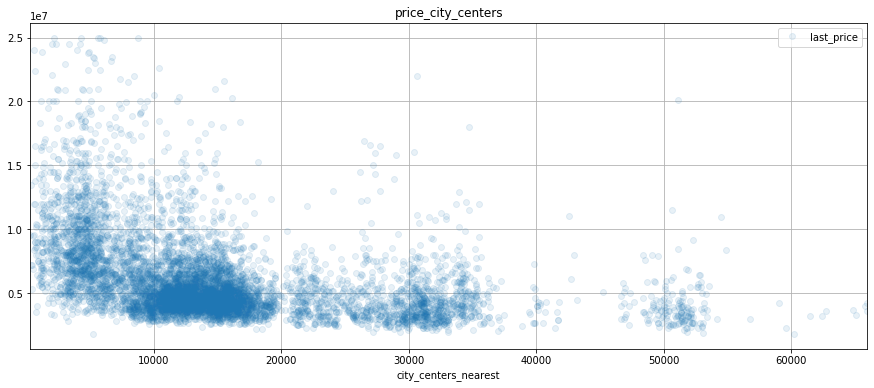

In [69]:
clear_df.pivot_table(index='city_centers_nearest',
                     values='last_price',
                     aggfunc='median').plot(figsize=(15, 6),
                                            style='o',
                                            alpha=0.1,
                                            grid=True,
                                            title='price_city_centers');

Прямая зависимость видна на графике цена-площадь. Зависимость цены от удаленности от центра слабая.

In [70]:
def analysis_diagram(data, column):
    data.pivot_table(index=column,
                     values='last_price',
                     aggfunc='median').plot(figsize=(8, 4),
                                            grid=True,
                                            title='price_{}'.format(column));

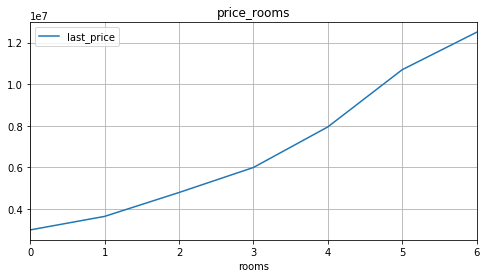

In [71]:
analysis_diagram(clear_df, 'rooms')

Чем больше комнат, тем выше медианная цена. Эта зависимость скорее объясняется общей площадью квартир.

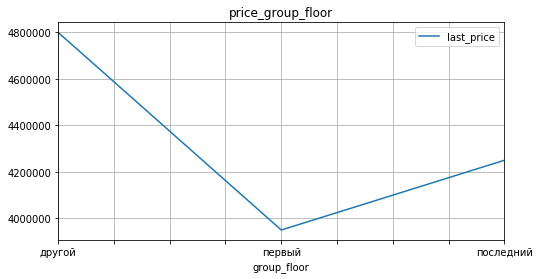

In [72]:
analysis_diagram(clear_df, 'group_floor')

На первом этаже цены ниже всего. Самые высокие цены имеют квартиры на этажах, отличных от первого и последнего.

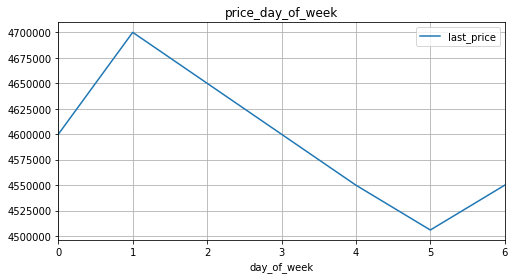

In [73]:
analysis_diagram(clear_df, 'day_of_week')

Медианное значение цены выше всего у объявлений, выложенных во вторник. Ниже всего цены у объявлений, опубликованных в субботу.

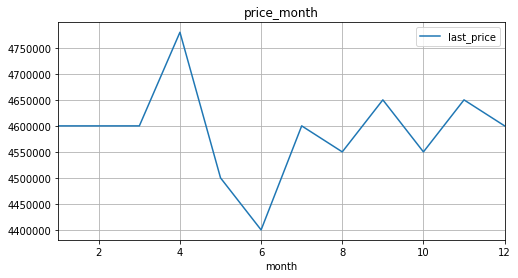

In [74]:
analysis_diagram(clear_df, 'month')

Выше всего цены в апреле. У объявлений, выложенных в июне цены имеют наименьшее медианное значение.

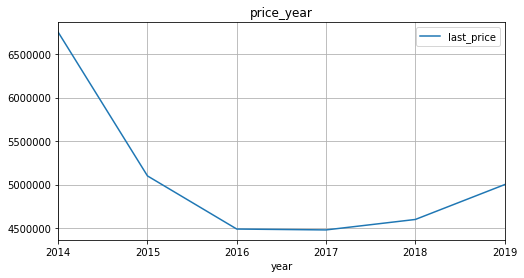

In [75]:
analysis_diagram(clear_df, 'year')

В 2014 году квартиры имели наибольшую цену. В 2016 и 2017 годах - наименьшую. После цена немного подросла.

**10 населённых пунктов с наибольшим числом объявлений:**

In [76]:
top_10_local = clear_df['locality_name'].value_counts().head(10)
top_10_local

Санкт-Петербург      14525
поселок Мурино         497
поселок Шушары         430
Всеволожск             389
Пушкин                 347
Колпино                334
поселок Парголово      324
Гатчина                301
деревня Кудрово        273
Выборг                 214
Name: locality_name, dtype: int64

In [77]:
clear_df.query('locality_name in @top_10_local.index') \
        .pivot_table(index='locality_name', values='price_per_square') \
        .sort_values(by='price_per_square', ascending=False).reset_index(drop=False)

,locality_name,price_per_square
0,Санкт-Петербург,109264.093425
1,Пушкин,101894.832853
2,деревня Кудрово,91786.498168
3,поселок Парголово,90460.777778
4,поселок Мурино,84303.490946
5,поселок Шушары,78023.309302
6,Колпино,75283.844311
7,Гатчина,69346.189369
8,Всеволожск,68647.912596
9,Выборг,58163.649533


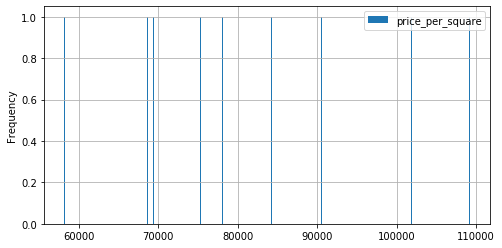

In [78]:
clear_df.query('locality_name in @top_10_local.index') \
        .pivot_table(index='locality_name', values='price_per_square') \
        .sort_values(by='price_per_square', ascending=False).plot(kind='hist',
                      bins=500,
                      figsize=(8, 4),
                      grid=True);

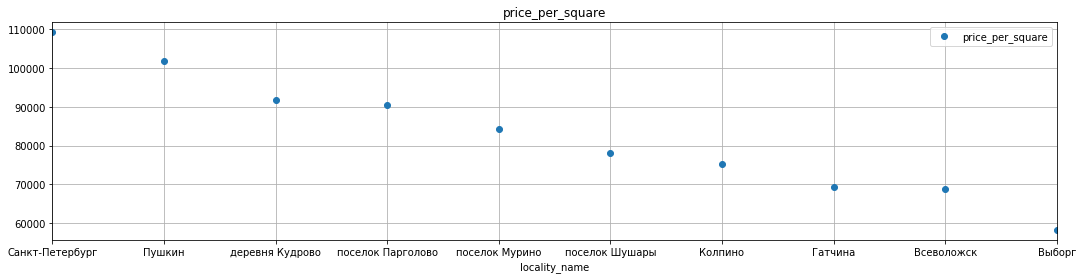

In [79]:
clear_df.query('locality_name in @top_10_local.index') \
        .pivot_table(index='locality_name',
                     values='price_per_square') \
        .sort_values(by='price_per_square',
                     ascending=False) \
        .plot(figsize=(18, 4),
              style='o',
              grid=True,
              title='price_per_square');

Наибольшая средняя цена квадратного метра в Санкт-Петербурге и Пушкине, наименьшая - в Выборге и Всеволожске

In [80]:
spb_df = clear_df.query('locality_name == "Санкт-Петербург"')

In [81]:
spb_df = spb_df[spb_df['city_centers_nearest'].notna()]

In [82]:
spb_df['city_centers_nearest_km'] = spb_df['city_centers_nearest'] / 1000

In [83]:
spb_df['city_centers_nearest_km'] = spb_df['city_centers_nearest_km'].astype(int)

In [84]:
spb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14478 entries, 0 to 21862
Data columns (total 30 columns):
total_images               14478 non-null int64
last_price                 14478 non-null int64
total_area                 14478 non-null float64
first_day_exposition       14478 non-null datetime64[ns]
rooms                      14478 non-null int64
ceiling_height             14478 non-null float64
floors_total               14413 non-null float64
living_area                14478 non-null float64
floor                      14478 non-null int64
is_apartment               14478 non-null bool
studio                     14478 non-null bool
open_plan                  14478 non-null bool
kitchen_area               14478 non-null float64
balcony                    14478 non-null int64
locality_name              14478 non-null object
airports_nearest           14459 non-null float64
city_centers_nearest       14478 non-null float64
parks_around_3000          14478 non-null float64
park

In [85]:
spb_df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_per_square,day_of_week,month,year,group_floor,living_to_total,kitchen_to_total,city_centers_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,755.0,NaN,120370,3,3,2019,другой,0.47,0.23,16
2,10,5196000,56.0,2015-08-20,2,2.60,5.0,34.3,4,False,...,574.0,558.0,92785,3,8,2015,другой,0.61,0.15,13
3,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,48.0,121.0,100000,1,6,2018,другой,0.32,0.41,8
6,5,7915000,71.6,2019-04-18,2,2.60,24.0,30.5,22,False,...,NaN,NaN,110544,3,4,2019,другой,0.43,0.26,11
8,18,5400000,61.0,2017-02-26,3,2.50,9.0,43.6,7,False,...,NaN,289.0,88524,6,2,2017,другой,0.71,0.11,15


In [86]:
spb_df.pivot_table(index='city_centers_nearest_km', values='last_price').reset_index(drop=False)

,city_centers_nearest_km,last_price
0,0,1.009193e+07
1,1,1.009615e+07
2,2,9.655086e+06
3,3,9.098956e+06
4,4,1.011644e+07
5,5,9.122601e+06
6,6,8.739528e+06
7,7,8.497796e+06
8,8,7.803989e+06
9,9,6.216156e+06


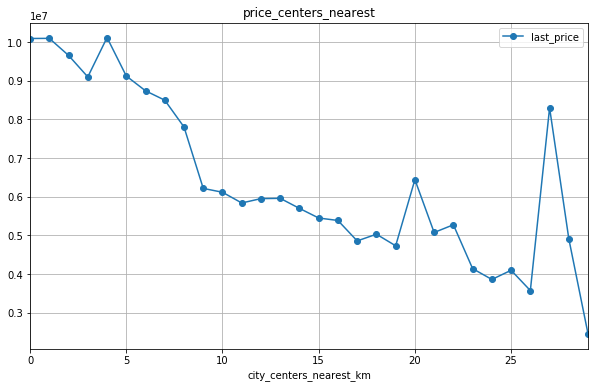

In [87]:
spb_df.pivot_table(index='city_centers_nearest_km',
                   values='last_price').plot(figsize=(10, 6),
                                             grid=True,
                                             style='o-',
                                             title='price_centers_nearest');

До 4 километров включительно - это центр. Я думаю, что пик на 4-х километрах объясняется тем, что квартира находится на границе центра и нецентра, поэтому ее стараются продать подороже. По аналогии: квартиры в Москве возле МКАДа. Дома могут стоять друг от друга через дорогу, но один дом официально является Москвой, а второй - уже Московская область.

In [88]:
spb_center_df = spb_df.query('city_centers_nearest_km <= 4')

In [89]:
spb_center_df[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,1486.000000,1.486000e+03,1486.000000,1486.000000
mean,80.546878,9.780039e+06,2.728129,2.867355
std,30.525880,4.419988e+06,1.114388,0.231280
min,27.000000,1.600000e+06,0.000000,2.500000
25%,58.125000,6.700000e+06,2.000000,2.650000
50%,75.450000,8.600000e+06,3.000000,2.800000
75%,98.650000,1.198000e+07,3.000000,3.050000
max,170.000000,2.500000e+07,6.000000,3.300000


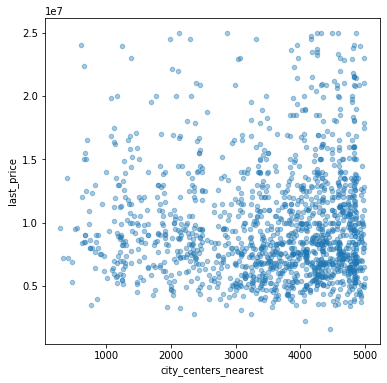

In [90]:
spb_center_df.plot(kind='scatter',
                   figsize=(6, 6),
                   x='city_centers_nearest',
                   y='last_price',
                  alpha=0.4);

In [91]:
spb_df[['last_price',
        'total_area',
        'city_centers_nearest',
        'rooms',
        'group_floor',
        'day_of_week',
        'month',
        'year']].corr()

,last_price,total_area,city_centers_nearest,rooms,day_of_week,month,year
last_price,1.000000,0.819414,-0.385415,0.506909,-0.007575,-0.004269,-0.011884
total_area,0.819414,1.000000,-0.291392,0.781944,-0.007331,0.009017,-0.080966
city_centers_nearest,-0.385415,-0.291392,1.000000,-0.217356,-0.003911,0.007899,0.074459
rooms,0.506909,0.781944,-0.217356,1.000000,-0.004160,-0.000949,-0.045003
day_of_week,-0.007575,-0.007331,-0.003911,-0.004160,1.000000,0.001656,0.002397
month,-0.004269,0.009017,0.007899,-0.000949,0.001656,1.000000,-0.279890
year,-0.011884,-0.080966,0.074459,-0.045003,0.002397,-0.279890,1.000000


In [92]:
spb_center_df[['last_price',
               'total_area',
               'city_centers_nearest',
               'rooms',
               'group_floor',
               'day_of_week',
               'month',
               'year']].corr()

,last_price,total_area,city_centers_nearest,rooms,day_of_week,month,year
last_price,1.000000,0.676300,0.016014,0.383562,-0.021198,-0.052500,0.037881
total_area,0.676300,1.000000,-0.024852,0.768538,-0.032662,-0.020196,-0.074093
city_centers_nearest,0.016014,-0.024852,1.000000,-0.085834,-0.057436,0.016643,0.003982
rooms,0.383562,0.768538,-0.085834,1.000000,-0.032363,-0.016442,-0.052050
day_of_week,-0.021198,-0.032662,-0.057436,-0.032363,1.000000,0.052724,-0.005253
month,-0.052500,-0.020196,0.016643,-0.016442,0.052724,1.000000,-0.254077
year,0.037881,-0.074093,0.003982,-0.052050,-0.005253,-0.254077,1.000000


In [93]:
def center_vs_spb_diagram(city, center, column):
    ax = city.pivot_table(index=column,
                        values='last_price',
                        aggfunc='median').plot();

    center.pivot_table(index=column,
                          values='last_price',
                          aggfunc='median').plot(figsize=(8, 4),
                                                 grid=True,
                                                 ax=ax,
                                                 title='price_{}'.format(column));
    ax.legend(['city', 'center']);

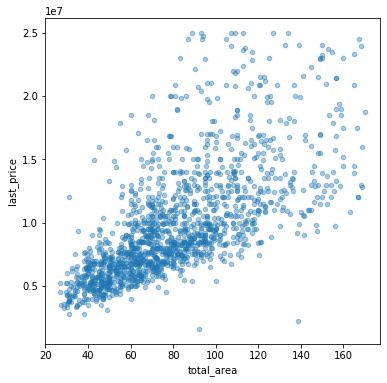

In [94]:
spb_center_df.plot(kind='scatter',
                   figsize=(6, 6),
                   x='total_area',
                   y='last_price',
                  alpha=0.4);

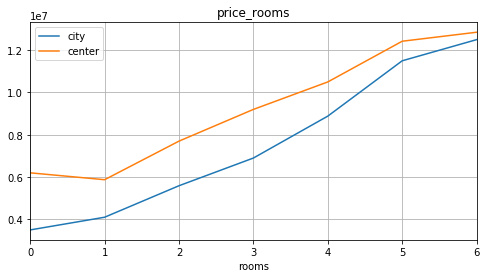

In [95]:
center_vs_spb_diagram(spb_df, spb_center_df, 'rooms')

В центре Питера зависимость цены квартиры от количества комнат меньше, чем во всем городе.

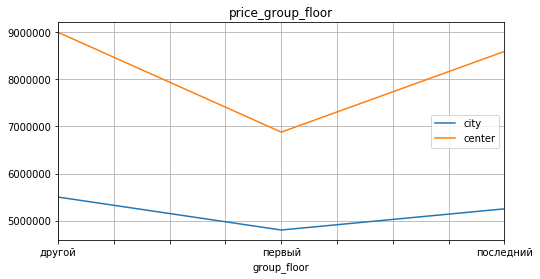

In [96]:
center_vs_spb_diagram(spb_df, spb_center_df, 'group_floor')

В центре зависимость цены от этажа более выражена.

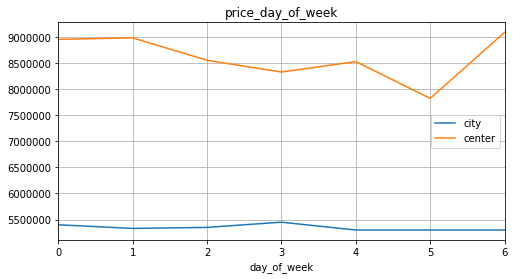

In [97]:
center_vs_spb_diagram(spb_df, spb_center_df, 'day_of_week')

В центре зависимость цены от публикаций в определенные дни недели более выражена по сравнению со всем городом. Дешевле всего квартиры, опубликованные в субботу. Дороже всего - в воскресенье.

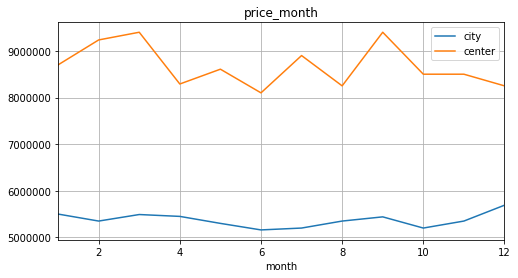

In [98]:
center_vs_spb_diagram(spb_df, spb_center_df, 'month')

По месяцам цены в центре так же "колбасит" сильнее, чем по всему городу. Дороже всего квартиры в марте и сентябре. Дешевле всего в июне.

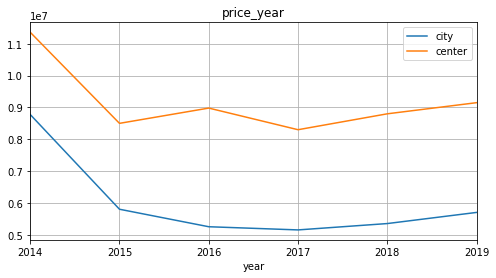

In [99]:
center_vs_spb_diagram(spb_df, spb_center_df, 'year')

По годам цены квартир из центра почти повторяют цены в целом по городу, за исключением 2016 года.

В центре корреляция цены и параметров квартир ниже, чем во всем городе. Я думаю, что когда речь идет о центре, в стоимость квартиры включаются такой психологический и неосязаемый параметр, как престиж. Следовательно, наши изучаемые параметры влияют на стоимость все меньше и меньше. А вот дата публикации влияет сильнее, чем по городу. Думаю, что здесь как-то влияет сезонность.

## Вывод

У нас огромное количество пропусков в стобцах 'is_apartment', ‘parks_nearest’, ‘ponds_nearest’, ‘balcony’ и ‘ceiling_height’. Скорее всего эти столбцы заполняются людьми вручную и нужно сделать эту форму обязательной для заполнения. Большая часть продающихся квартир имеет общую площадь от 40 до 69 квадратных метров, 1, 2 или 3-комнаты, высоту потолков от 2.55 до 2.75м, цену от 3.4 до 6.8млн.р. и объявление о продаже висит от 45 дней до 7 с половиной месяцев (232 дня).

Больше всего на цену квартиры влияет общая площадь. Зависимость цены от удаленности от центра слабая. Чем больше комнат, тем выше цена. Эта зависимость скорее объясняется общей площадью квартир. На первом этаже цены ниже всего. Самые высокие цены имеют квартиры на этажах, отличных от первого и последнего. Цены выше всего у объявлений, выложенных во вторник. Ниже всего цены у объявлений, опубликованных в субботу. Выше всего цены в апреле. У объявлений, выложенных в июне цены имеют наименьшую цену. В 2014 году квартиры имели наибольшую цену. В 2016 и 2017 годах - наименьшую. После цена немного подросла. Центром Санкт-Петербурга можно считать расстояние до 4км включительно. В центре Питера зависимость цены квартиры от количества комнат меньше, чем во всем городе. Кроме того, цены центра в среднем выше, чем по всему городу и зависимость цены от этажа, даты публикации сильнее. По годам цены квартир из центра почти повторяют цены в целом по городу, за исключением 2016 года.